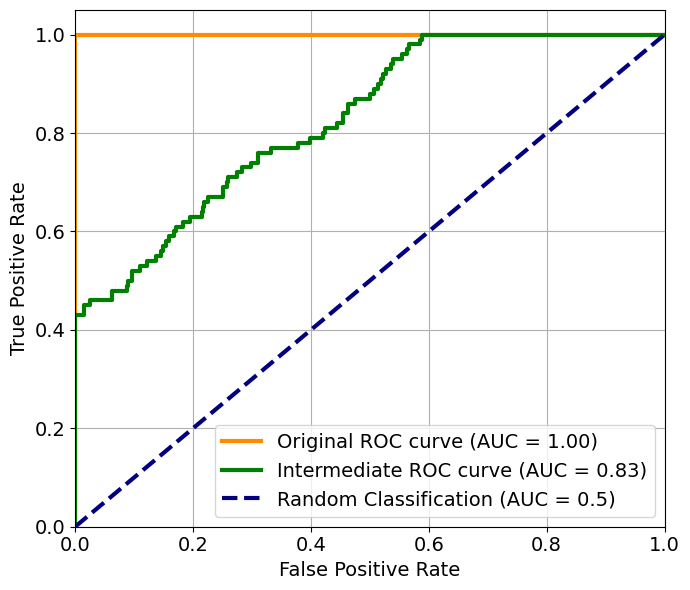

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example data for the ROC curve
np.random.seed(42)
y_true = np.concatenate([np.zeros(900), np.ones(100)])  # Unbalanced dataset
scores = np.concatenate([np.random.uniform(0, 0.5, 900), np.random.uniform(0.5, 1, 100)])

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_true, scores)
roc_auc = auc(fpr, tpr)

# Adjusting scores for an intermediate model
scores_intermediate = np.concatenate([
    np.random.uniform(0, 0.7, 900),
    np.random.uniform(0.3, 1, 100)
])
fpr_intermediate, tpr_intermediate, _ = roc_curve(y_true, scores_intermediate)
roc_auc_intermediate = auc(fpr_intermediate, tpr_intermediate)

# Plotting the ROC curves with thesis-specific adjustments
fontsize=14
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'Original ROC curve (AUC = {roc_auc:.2f})')
plt.plot(fpr_intermediate, tpr_intermediate, color='green', lw=3, label=f'Intermediate ROC curve (AUC = {roc_auc_intermediate:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Random Classification (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=fontsize)
plt.ylabel('True Positive Rate', fontsize=fontsize)
plt.legend(loc="lower right", fontsize=fontsize)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tight_layout()
plt.savefig('../../images/roc/roc_curve.pdf')
plt.show()
